# 4.0 Introduction to Matplotlib

Much is borrowed from Chapter 4 of VanderPlas -- basically extracted lots of his examples.  The details/text/explainations are in the book's notebooks (and its web page).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Plotting Directly from Pandas DataFrames

In [2]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
df = pd.read_csv("../data/10_us_economic_data.csv")
df.head()

,Month,UnemploymentRate,JobsAdded,GDP
0,1/2008,5.0,8.0,14651.04
1,2/2008,4.9,-81.0,NaN
2,3/2008,5.1,-55.0,NaN
3,4/2008,5.0,-229.0,14805.61
4,5/2008,5.4,-184.0,NaN


<AxesSubplot:>

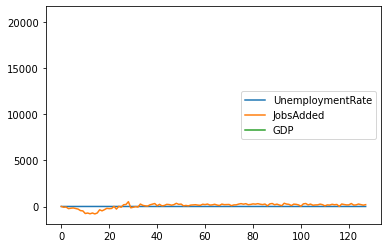

In [3]:
# Just plain plot function
df.plot()

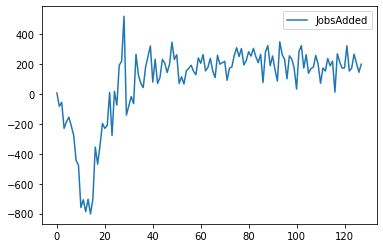

In [4]:
df.plot(y='JobsAdded');

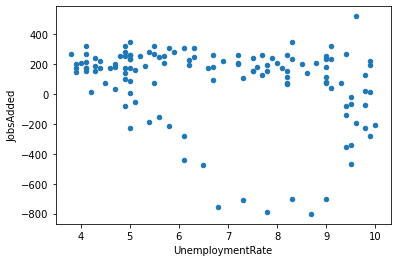

In [5]:
df.plot(x ='UnemploymentRate', y='JobsAdded', kind='scatter');

<AxesSubplot:>

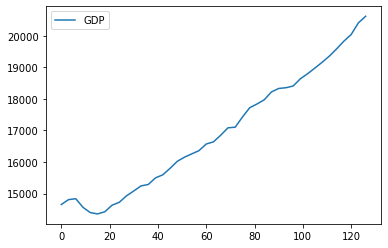

In [6]:
df.dropna().plot(y='GDP')

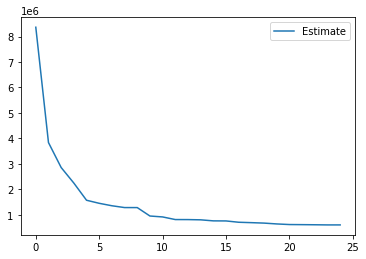

In [7]:
df = pd.read_csv("../data/01_U.S._Top_25_Largest_Cities.csv")
df.plot(y='Estimate');

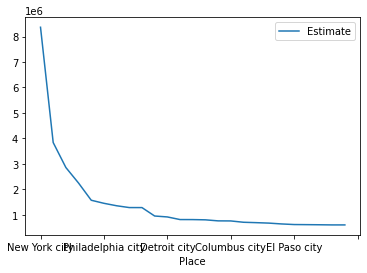

In [8]:
df.plot(x='Place',y='Estimate');

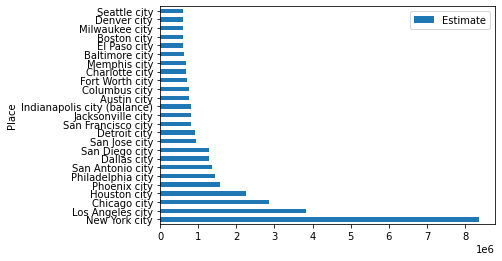

In [9]:
df.plot(x='Place',y='Estimate', kind='barh');

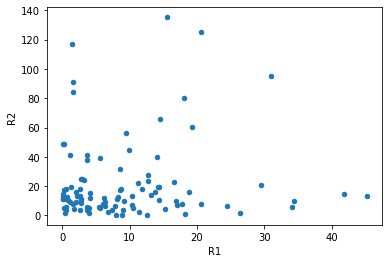

In [10]:
df = pd.read_csv("../data/13_erv.csv")
df.plot(x ='R1', y='R2', kind='scatter');

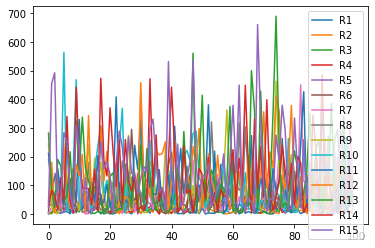

In [11]:
df.plot();

<AxesSubplot:>

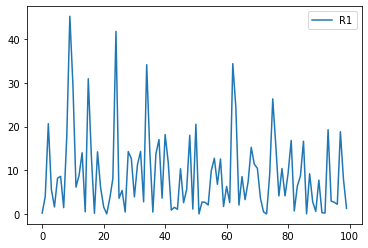

In [12]:
df.plot(y='R1')

<AxesSubplot:>

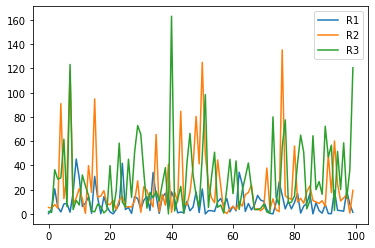

In [13]:
df.plot(y=['R1', 'R2', 'R3'])

## Native Matplotlib

In [15]:
x = np.linspace(0, 10, 100)
# What is x?   https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
# "Returns evenly spaced numbers over a specified interval"
print(x)

[ 0.          0.1010101   0.2020202   0.3030303   0.4040404   0.50505051
  0.60606061  0.70707071  0.80808081  0.90909091  1.01010101  1.11111111
  1.21212121  1.31313131  1.41414141  1.51515152  1.61616162  1.71717172
  1.81818182  1.91919192  2.02020202  2.12121212  2.22222222  2.32323232
  2.42424242  2.52525253  2.62626263  2.72727273  2.82828283  2.92929293
  3.03030303  3.13131313  3.23232323  3.33333333  3.43434343  3.53535354
  3.63636364  3.73737374  3.83838384  3.93939394  4.04040404  4.14141414
  4.24242424  4.34343434  4.44444444  4.54545455  4.64646465  4.74747475
  4.84848485  4.94949495  5.05050505  5.15151515  5.25252525  5.35353535
  5.45454545  5.55555556  5.65656566  5.75757576  5.85858586  5.95959596
  6.06060606  6.16161616  6.26262626  6.36363636  6.46464646  6.56565657
  6.66666667  6.76767677  6.86868687  6.96969697  7.07070707  7.17171717
  7.27272727  7.37373737  7.47474747  7.57575758  7.67676768  7.77777778
  7.87878788  7.97979798  8.08080808  8.18181818  8

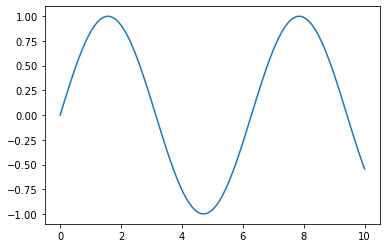

In [16]:
# Matlab-style interface (stateful) - Simple version
plt.figure()
plt.plot(x, np.sin(x));
# Note that if we don't have the initial figure() call, plt.plot() will create
# the figure and axes for us.  I usually add it explicitly (not sure why, though)
# Also note the trailing semi-colon ... ?  
# See https://stackoverflow.com/questions/51627233/why-is-there-a-semicolon-after-matplotlibs-plot-function

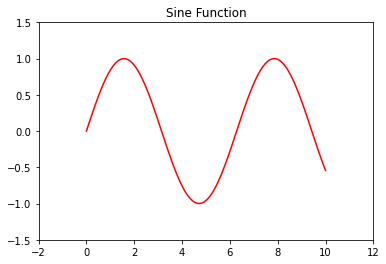

In [17]:
# change the look jut a little
plt.figure()
plt.plot(x, np.sin(x), 'r-');
plt.title("Sine Function");
plt.axis([-2, 12, -1.5, 1.5]);
# Note here that we added components to the plot after the plot() constructor.

## Subplots

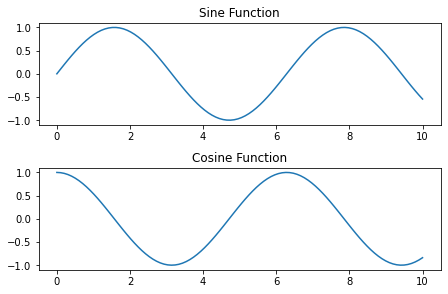

In [18]:
# Matlab-style interface (stateful)
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))
plt.title("Sine Function")

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))
plt.title("Cosine Function")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

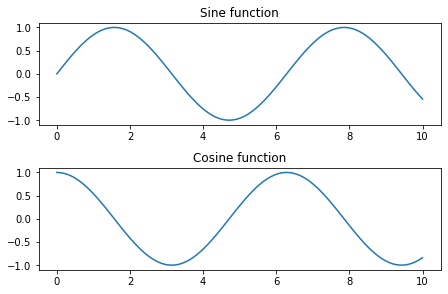

In [19]:
# Object-oriented interface
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)
# Initial function arguements: .subplots(nrows=1,ncols=1)
# Result? 2 rows, 1 column.

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
ax[0].set_title('Sine function')
ax[1].set_title('Cosine function')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
# Save the figure to a file
fig.savefig('first_figure.png')

Text(0.5, 1.0, 'Cosine function')

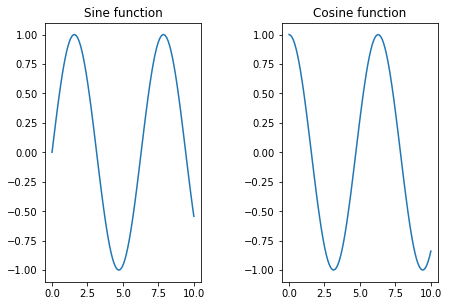

In [20]:
# Same plot, but side-by-side
fig, ax = plt.subplots(1, 2)
# 1 row, 2 columns
plt.tight_layout(pad=0.4, w_pad=5.0, h_pad=1.0)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
ax[0].set_title('Sine function')
ax[1].set_title('Cosine function')

## Example of sequential construction

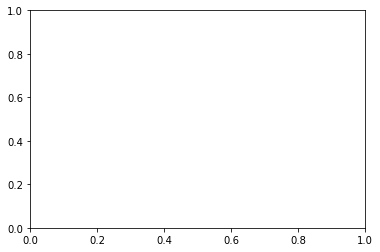

In [21]:
# Create a blank figure and retrieve the axis
fig = plt.figure()
ax = plt.axes()

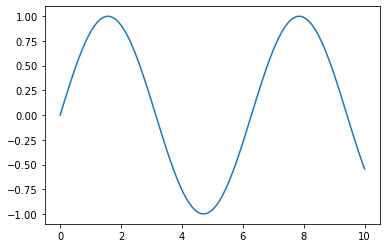

In [22]:
# Add a simple line plot
plt.plot(x, np.sin(x))

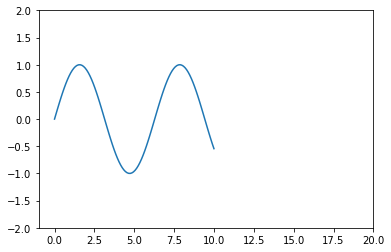

In [23]:
# Change the plot limits
plt.plot(x, np.sin(x))
plt.xlim(-1, 20)
plt.ylim(-2, 2);

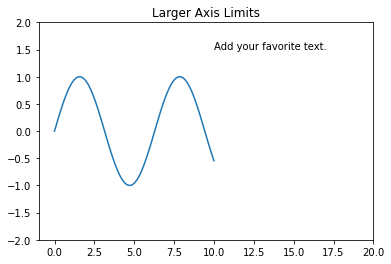

In [24]:
# Add a title and some text
plt.plot(x, np.sin(x))
plt.xlim(-1, 20)
plt.ylim(-2, 2);
plt.title("Larger Axis Limits")
plt.text(10, 1.5, "Add your favorite text.");

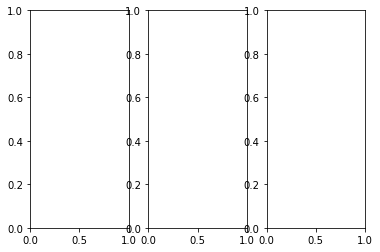

In [26]:
# With the OO interface
fig, ax = plt.subplots(1, 3)

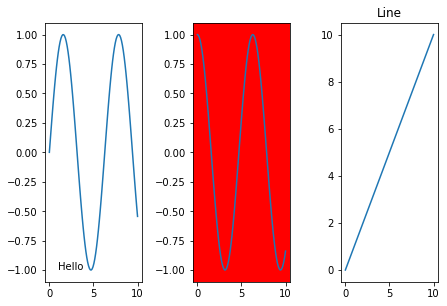

In [27]:
# With the OO interface - Note that we can add/edit individual axes at any time --
# i.e., there is no notion of a "current axes" (i.e., not stateful)
fig, ax = plt.subplots(1, 3)
plt.tight_layout(pad=0.4, w_pad=2.0, h_pad=1.0)
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))
ax[2].plot(x, x)
ax[2].set_title("Line")
ax[0].text(1,-1,"Hello");
ax[1].set_fc('red')
# See https://matplotlib.org/3.1.1/api/axes_api.html for other commands

## Styles

In [28]:
# Available style sheets (styles)
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


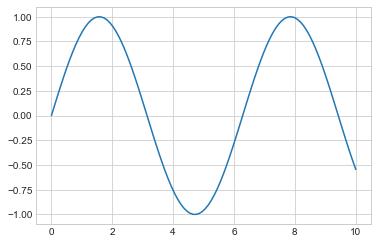

In [29]:
plt.style.use('seaborn-whitegrid')
# Note that styles are persistent -- if you go "back" and generate
# some of the previous plots, the style will be used.
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x));

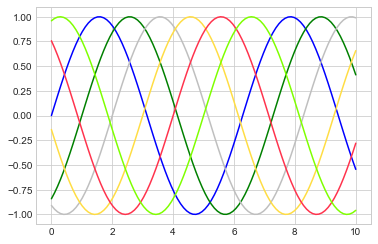

In [30]:
# color specification
plt.figure()
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

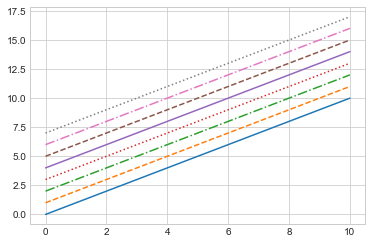

In [32]:
# Line styles
plt.figure()
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

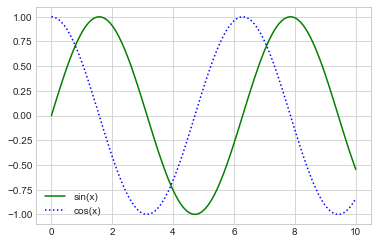

In [33]:
# Note the difference when you comment out the "axis equal" statement
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
#plt.axis('equal')
plt.legend();

In [34]:
# What's going on with the plt.axis('equal') statement?
plt.axis?

## Other Examples of Line and Scatter Plots

Text(2, -1.5, 'Can still add components.')

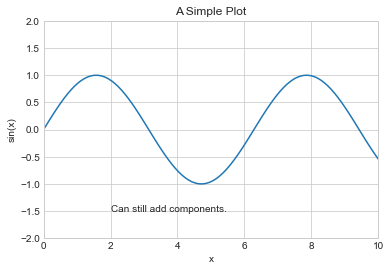

In [35]:
# set several things at once with the set() function and the o-o interface
ax = plt.axes()
ax.plot(x, np.sin(x))
ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x', ylabel='sin(x)',
       title='A Simple Plot');
ax.text(2, -1.5, "Can still add components.")

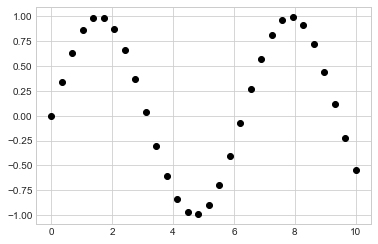

In [36]:
# add a third argument to make a scatter plot
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black');

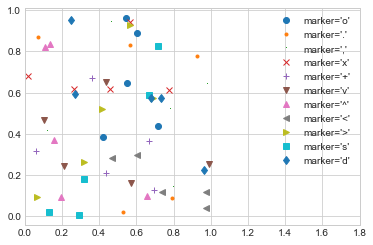

In [37]:
# Add elements one-by-one to the list to see how this works
# Also, explore in IPython for further details
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
#for marker in ['o']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);
# Make sure that you can decipher the code.  Try swaping the "for" statments
# (i.e, switch the comment marker)

In [38]:
# what is this "RandomState" thing?
np.random.RandomState?

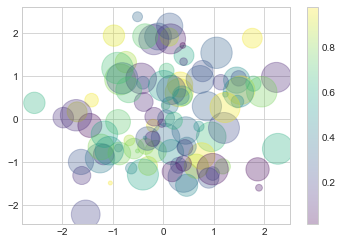

In [39]:
# scatter is a more powerful/flexible function to create scatter plots
# Note that scatter is less efficient as it must individually compute
# rendering data for each point.
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar();  # show color scale
# Hmmmm ... cmaps ... https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
# Make sure that you understand what's going on here - i.e., what is x?  y?  colors? sizes?

## Iris Plants Database
This is a copy of UCI ML iris datasets (http://archive.ics.uci.edu/ml/datasets/Iris)

The famous Iris database, first used by Sir R.A Fisher  This is perhaps the best known database to be found in the pattern recognition literature.  Fisher\'s paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.  

References ----------    - Fisher,R.A. "The use of multiple measurements in taxonomic problems"      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to      Mathematical Statistics" (John Wiley, NY, 1950).    - Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.    - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System      Structure and Classification Rule for Recognition in Partially Exposed      Environments".  IEEE Transactions on Pattern Analysis and Machine      Intelligence, Vol. PAMI-2, No. 1, 67-71.    - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions      on Information Theory, May 1972, 431-433.    - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II      conceptual clustering system finds 3 classes in the data.    - Many, many more ... '

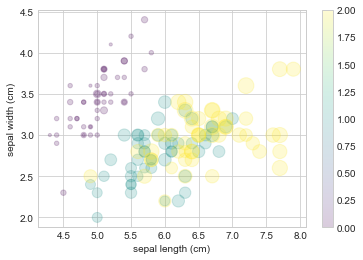

In [40]:
# Same type of plot as above, except using some real, non-random data.
#
# Iris Dataset with sklearn
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);
plt.colorbar()

In [41]:
# So what is iris (the data type)
type(iris), iris.keys()

(sklearn.utils.Bunch,
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']))

## Histograms

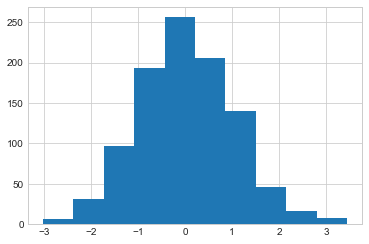

In [43]:
# histograms
data = np.random.randn(1000)
plt.hist(data);

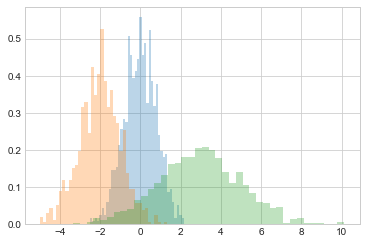

In [44]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
fig=plt.hist(x3, **kwargs)
# What are these **kwargs things?
# Why the "fig=" on the last function call?

In [ ]:
plt.hist?

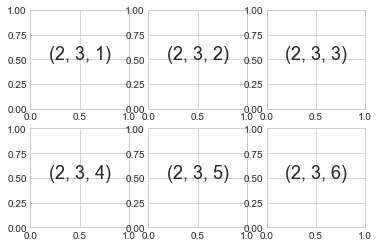

In [45]:
# How about some subplots ...
# Note the (rows, cols, num) args for the subplot() call.
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

In [ ]:
# Subplots in action
# erv.csv data - a 100x15 matrix of floats - a text file
# 15 cols 
erv = np.genfromtxt('..\data\erv.csv', delimiter=',')
# Create 15 subplots in a 3x5 gridor witha color for each
c = ['orange', 'green', 'red', 'beige', 'brown'
    ,'dimgray', 'firebrick', 'darkkhaki', 'indigo', 'darksalmon'
    ,'forestgreen', 'fuchsia', 'darkcyan', 'darkviolet','darkgoldenrod'
    ]
plt.figure(figsize=(20, 8))
for j in range(15):
    plt.subplot(3,5,j+1)
    plt.hist(erv[:,j], color=c[j])
plt.show()
# Make sure that you understand how the indexer (j) is
# being used here.

In [ ]:
# np.genfromtxt()?????
np.genfromtxt?

In [ ]:
# Annotations, etc.
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

# transform=ax.transData is the default, but we'll specify it anyway
ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

In [ ]:
# More annotations
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

## Visualization with Seaborn
Ntoes from 04.14 of VanderPlas

In [ ]:
# Facets - Prep the data first
tips = sns.load_dataset('tips')
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

In [ ]:
# Create the plot
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

In [ ]:
# make sure the imports have been done before executing
sns.set()

In [ ]:
# Use the Seaborn settings to plt a random walk (6 reps.)
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
plt.figure(figsize=(10,7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');
# Note that we are making a single 'plot' call here, but are
# passing a 1-D array (x) and a 2-D array (y) 

In [ ]:
sns.set?

In [ ]:
np.random.multivariate_normal?

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=4000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

In [ ]:
sns.distplot(data['x'])
sns.distplot(data['y']);

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

In [127]:
import pandas as pd
mydict = [{'a': 1, 'b': 2, 'c': 3, 'd': 4},
          {'a': 100, 'b': 200, 'c': 300, 'd': 400},
          {'a': 1000, 'b': 2000, 'c': 3000, 'd': 4000 }]

df = pd.DataFrame(mydict)
index = random.sample(range(0, 4), 2)
df.iloc[:, index], df

(      b     d
 0     2     4
 1   200   400
 2  2000  4000,
       a     b     c     d
 0     1     2     3     4
 1   100   200   300   400
 2  1000  2000  3000  4000)